# DATA602 Project 1: Data Manipulation with Numpy and Pandas
Group 6: 
Koushik Ajjuguttu, 

Elizabeth Cardosa, 

Jaydeep Radadia, 

Stephanie Zhang

Contributions: Each group member attempted all the problems, then worked together as a group to determine the best solutions and resolve any questions. 

Assigned 2/14/22, Due 3/3/22

# Grade: 95



In [ ]:
!pip3 install yfinance

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import yfinance as yf

Input:
- Source data from https://finance.yahoo.com/
- The 3 assets' tickers tickers (AAPL, BTC USD, SPY)
- Use the time-period of Jan 1, 2021 - Dec 31, 2021 
- Download 3 CSV files, one for each of the assets

In [ ]:
# Use the yfinance python package to pull desired data from the Yahoo Finance API into pandas dataframes
start_date = pd.Timestamp(2021, 1, 1)
end_date = pd.Timestamp(2021, 12, 31)

df_aapl= yf.download('AAPL', start = start_date, end = end_date, freq = '1d')
df_btc_usd = yf.download('BTC-USD', start = start_date, end = end_date, freq = '1d')
df_spy = yf.download('SPY', start = start_date, end = end_date, freq = '1d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
df_aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453445,143301900
2021-01-05,128.889999,131.740005,128.429993,131.009995,130.041611,97664900
2021-01-06,127.720001,131.050003,126.379997,126.599998,125.664215,155088000
2021-01-07,128.360001,131.630005,127.860001,130.919998,129.952286,109578200
2021-01-08,132.429993,132.630005,130.229996,132.050003,131.073914,105158200


In [ ]:
df_btc_usd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359
2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765
2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202
2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344
2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782


In [ ]:
df_spy.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,375.309998,375.450012,364.820007,368.790009,363.938782,110210800
2021-01-05,368.100006,372.500000,368.049988,371.329987,366.445343,66426200
2021-01-06,369.709991,376.980011,369.119995,373.549988,368.636108,107997700
2021-01-07,376.100006,379.899994,375.910004,379.100006,374.113129,68766800
2021-01-08,380.589996,381.489990,377.100006,381.260010,376.244751,71677200


## 1. Change the 'Date' column to pd.timestamp format. Output the median timestamp for each df.

In [ ]:
# The Date column downloaded from yfinance is already pd.timestamp format
# Reset index for later operations on the dataframes
df_aapl.reset_index(inplace=True)
df_btc_usd.reset_index(inplace=True)
df_spy.reset_index(inplace=True)

In [ ]:
# Show the Date columns are timestamps
print("AAPL:", df_aapl['Date'].dtypes, "BTC-USD:", df_btc_usd['Date'].dtypes, "SPY:", df_spy['Date'].dtypes)

AAPL: datetime64[ns] BTC-USD: datetime64[ns] SPY: datetime64[ns]


In [ ]:
# Show the median timestamps
print("AAPL:", df_aapl['Date'].median(), "BTC-USD:", df_btc_usd['Date'].median(), "SPY:", df_spy['Date'].median())

AAPL: 2021-07-02 00:00:00 BTC-USD: 2021-07-02 00:00:00 SPY: 2021-07-02 00:00:00


## 2. Define a udf, called 'daily_return': $(x_t - x_{t-1})/x_{t-1}$ 
Apply this function to both "Open" and "Adj Close"for each df. Name the new columns properly. For each df:
- Output the average Open_daily_return
- Output the average Adj_Close_daily_return, weighted by 'volume'

In [ ]:
# Input: x = x_t, x.shift(1) = x_(t-1)
daily_return = lambda x: (x-x.shift(1))/x.shift(1)

In [ ]:
# Calculate the weighted average by volume for each row in the dataframe  w_avg = x * weight / sum(weight)
weighted_average = lambda col, weights: np.nansum(col*weights)/np.sum(weights)

In [ ]:
df_aapl['Open_daily_return'] = daily_return(df_aapl['Open'])
print('AAPL Average Open Daily Return:', df_aapl['Open_daily_return'].mean())

AAPL Average Open Daily Return: 0.001310779827998792


In [ ]:
df_aapl['Adj_Close_daily_return'] = daily_return(df_aapl['Adj Close'])
print('AAPL Average Adjusted Close Daily Return, Weighted by Volume:', weighted_average(df_aapl['Adj_Close_daily_return'],df_aapl['Volume']))

AAPL Average Adjusted Close Daily Return, Weighted by Volume: 0.0007252994531127799


In [ ]:
df_aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_daily_return,Adj_Close_daily_return
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453445,143301900,NaN,NaN
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.041611,97664900,-0.034676,0.012364
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.664215,155088000,-0.009077,-0.033661
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.952286,109578200,0.005011,0.034123
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.073914,105158200,0.031708,0.008631


In [ ]:
df_btc_usd['Open_daily_return'] = daily_return(df_btc_usd['Open'])
print('BTC USD Average Open Daily Return:', df_btc_usd['Open_daily_return'].mean())

BTC USD Average Open Daily Return: 0.00223509305713098


In [ ]:
df_btc_usd['Adj_Close_daily_return'] = daily_return(df_btc_usd['Adj Close'])
print('BTC USD Average Adjusted Close Daily Return, Weighted by Volume:', weighted_average(df_btc_usd['Adj_Close_daily_return'],df_btc_usd['Volume']))

BTC USD Average Adjusted Close Daily Return, Weighted by Volume: 0.0008862472857050695


In [ ]:
df_btc_usd.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_daily_return,Adj_Close_daily_return
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,NaN,NaN
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,0.013190,0.093726
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,0.093713,0.020380
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,0.021212,-0.024712
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,-0.025416,0.063197


In [ ]:
df_spy['Open_daily_return'] = daily_return(df_spy['Open'])
print('SPY Average Open Daily Return:', df_spy['Open_daily_return'].mean())

SPY Average Open Daily Return: 0.0009979419250299396


In [ ]:
df_spy['Adj_Close_daily_return'] = daily_return(df_spy['Adj Close'])
print('SPY Average Adjusted Close Daily Return, Weighted by Volume:', weighted_average(df_spy['Adj_Close_daily_return'],df_btc_usd['Volume']))

SPY Average Adjusted Close Daily Return, Weighted by Volume: 0.0010470192705731814


In [ ]:
df_spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Open_daily_return,Adj_Close_daily_return
0,2021-01-04,375.309998,375.450012,364.820007,368.790009,363.938782,110210800,NaN,NaN
1,2021-01-05,368.100006,372.500000,368.049988,371.329987,366.445343,66426200,-0.019211,0.006887
2,2021-01-06,369.709991,376.980011,369.119995,373.549988,368.636108,107997700,0.004374,0.005978
3,2021-01-07,376.100006,379.899994,375.910004,379.100006,374.113129,68766800,0.017284,0.014858
4,2021-01-08,380.589996,381.489990,377.100006,381.260010,376.244751,71677200,0.011938,0.005698


## 3. Concatenate the 3 df into a single df, vertically. Make sure you have a column 'ticker' that tells you which ticker the observation is. 
- By ticker, output the Min, Max, Mean of 'Open_daily_return'
- Percentile rank 'Open_daily_return' across the df; name this column properly. Within each quartile bucket of 'Open_daily_return' (0-25%th, 25%-50%th, 50%-75%th, and >75%), count the number of observations of each ticker. 

In [ ]:
df = pd.concat([df_aapl,df_btc_usd,df_spy],keys=['AAPL','BTC USD','SPY']) # vertically concatenate the 3 dataframes and create corresponding ticker values
df = df.reset_index(level=0).rename(columns={'level_0':'ticker'}).reset_index(drop=True) # expand ticker index for each row as 'ticker' column and reset numeric index 
df

,ticker,Date,Open,High,Low,Close,Adj Close,Volume,Open_daily_return,Adj_Close_daily_return
0,AAPL,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453445,143301900,NaN,NaN
1,AAPL,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.041611,97664900,-0.034676,0.012364
2,AAPL,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.664215,155088000,-0.009077,-0.033661
3,AAPL,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.952286,109578200,0.005011,0.034123
4,AAPL,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.073914,105158200,0.031708,0.008631
...,...,...,...,...,...,...,...,...,...,...
862,SPY,2021-12-23,468.750000,472.190002,468.640015,470.600006,470.600006,56439700,0.012878,0.006222
863,SPY,2021-12-27,472.059998,477.309998,472.010010,477.260010,477.260010,56808600,0.007061,0.014152
864,SPY,2021-12-28,477.720001,478.809998,476.059998,476.869995,476.869995,47274600,0.011990,-0.000817
865,SPY,2021-12-29,476.980011,478.559998,475.920013,477.480011,477.480011,54503000,-0.001549,0.001279


In [ ]:
# Use groupby to find min, max, and mean of Open_daily_return
df.groupby('ticker')['Open_daily_return'].agg(['min','max','mean'])

,min,max,mean
ticker,,,
AAPL,-0.052185,0.049824,0.001311
BTC USD,-0.144168,0.187677,0.002235
SPY,-0.023633,0.021245,0.000998


In [ ]:
df['Open_daily_return'].value_counts(dropna=False)

 NaN         3
 0.020035    1
-0.056207    1
 0.003667    1
-0.057389    1
            ..
 0.066334    1
-0.008059    1
-0.007932    1
 0.033578    1
 0.001992    1
Name: Open_daily_return, Length: 865, dtype: int64

In [ ]:
df['Open_daily_return_percentile_rank'] = pd.qcut(df.loc[df['ticker'] == "AAPL", 'Open_daily_return'], [0, .25, .5, .75, 1], ['Q1', 'Q2', 'Q3', 'Q4'])
df['Open_daily_return_percentile_rank'].loc[df['ticker']=='AAPL'].value_counts()

Q1    63
Q4    63
Q2    62
Q3    62
Name: Open_daily_return_percentile_rank, dtype: int64

In [ ]:
df['Open_daily_return_percentile_rank'].loc[df['ticker']=='BTC USD'] = pd.qcut(df.loc[df['ticker'] == "BTC USD", 'Open_daily_return'], [0, .25, .5, .75, 1], ['Q1', 'Q2', 'Q3', 'Q4'])
df['Open_daily_return_percentile_rank'].loc[df['ticker']=='BTC USD'].value_counts()

Q1    91
Q2    91
Q3    91
Q4    91
Name: Open_daily_return_percentile_rank, dtype: int64

In [ ]:
df['Open_daily_return_percentile_rank'].loc[df['ticker']=='SPY'] = pd.qcut(df.loc[df['ticker'] == "SPY", 'Open_daily_return'], [0, .25, .5, .75, 1], ['Q1', 'Q2', 'Q3', 'Q4'])
df['Open_daily_return_percentile_rank'].loc[df['ticker']=='SPY'].value_counts()

Q1    63
Q4    63
Q2    62
Q3    62
Name: Open_daily_return_percentile_rank, dtype: int64

## 4. Using the concatenated df from step 3, pivot the long table into wide. Indexed by date, Columned by ticker, Valued by Open
- Show the shape of the data prior and after the pivot
- Compute the average of 'Open' for each ticker

In [ ]:
# shape before pivot 
df.shape 

(867, 11)

In [ ]:
df_wide = df.pivot(index='Date', columns='ticker', values='Open')

In [ ]:
# shape after the pivot
df_wide.shape 

(365, 3)

In [ ]:
print('Average of "Open" for AAPL:', df_wide['AAPL'].mean())
print('Average of "Open" for BTC USD:', df_wide['BTC USD'].mean())
print('Average of "Open" for SPY:', df_wide['SPY'].mean())

Average of "Open" for AAPL: 140.71354632738576
Average of "Open" for BTC USD: 47402.11566245719
Average of "Open" for SPY: 425.96761015021946


## 5. Using the 3 dfs from step 2, perform outer join of the 3 dfs on dates into another df, denoted as df_merge. Melt df_merge, denoted as df_melt, indexed by date, ticker.
- Compute the average Open by ticker, and compare the numbers against the output from 4. (note, when merging the dfs, please rename the column names properly) 

In [ ]:
df_merge = pd.merge(pd.merge(df_aapl, df_btc_usd, on='Date', how='outer',suffixes=['+aapl','+btc_usd']), df_spy.add_suffix('+spy'), left_on='Date', right_on='Date+spy', how='outer').drop(columns='Date+spy')

In [ ]:
df_merge

,Date,Open+aapl,High+aapl,Low+aapl,Close+aapl,Adj Close+aapl,Volume+aapl,Open_daily_return+aapl,Adj_Close_daily_return+aapl,Open+btc_usd,...,Open_daily_return+btc_usd,Adj_Close_daily_return+btc_usd,Open+spy,High+spy,Low+spy,Close+spy,Adj Close+spy,Volume+spy,Open_daily_return+spy,Adj_Close_daily_return+spy
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453445,143301900.0,NaN,NaN,32810.949219,...,0.021212,-0.024712,375.309998,375.450012,364.820007,368.790009,363.938782,110210800.0,NaN,NaN
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.041611,97664900.0,-0.034676,0.012364,31977.041016,...,-0.025416,0.063197,368.100006,372.500000,368.049988,371.329987,366.445343,66426200.0,-0.019211,0.006887
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.664215,155088000.0,-0.009077,-0.033661,34013.613281,...,0.063689,0.083311,369.709991,376.980011,369.119995,373.549988,368.636108,107997700.0,0.004374,0.005978
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.952286,109578200.0,0.005011,0.034123,36833.875000,...,0.082916,0.069157,376.100006,379.899994,375.910004,379.100006,374.113129,68766800.0,0.017284,0.014858
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.073914,105158200.0,0.031708,0.008631,39381.765625,...,0.069172,0.036234,380.589996,381.489990,377.100006,381.260010,376.244751,71677200.0,0.011938,0.005698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2021-12-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46853.867188,...,0.013730,-0.003026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
361,2021-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50806.050781,...,0.044826,0.000741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
362,2021-12-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50854.917969,...,0.000962,-0.007720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
363,2021-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50428.691406,...,-0.008381,0.007528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_melt = pd.wide_to_long(df_merge, stubnames=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume','Open_daily_return', 'Adj_Close_daily_return'],i=['Date'],j='ticker',sep='+',suffix='.+')

In [ ]:
df_melt

,,Open,High,Low,Close,Adj Close,Volume,Open_daily_return,Adj_Close_daily_return
Date,ticker,,,,,,,,
2021-01-04,aapl,133.520004,133.610001,126.760002,129.410004,128.453445,143301900.0,NaN,NaN
2021-01-05,aapl,128.889999,131.740005,128.429993,131.009995,130.041611,97664900.0,-0.034676,0.012364
2021-01-06,aapl,127.720001,131.050003,126.379997,126.599998,125.664215,155088000.0,-0.009077,-0.033661
2021-01-07,aapl,128.360001,131.630005,127.860001,130.919998,129.952286,109578200.0,0.005011,0.034123
2021-01-08,aapl,132.429993,132.630005,130.229996,132.050003,131.073914,105158200.0,0.031708,0.008631
...,...,...,...,...,...,...,...,...,...
2021-12-19,spy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-24,spy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12-25,spy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Output from #4: 

Average of "Open" for AAPL: 140.71354632738576 <br>
Average of "Open" for BTC USD: 47402.11566245719 <br>
Average of "Open" for SPY: 425.96761015021946

In [ ]:
# Average "Open" by ticker
df_melt.groupby('ticker')['Open'].mean()

ticker
aapl         140.713546
btc_usd    47402.115662
spy          425.967610
Name: Open, dtype: float64

## 6. Using df_melt from 5., define a 7-day moving average of 'Open_daily_return', denoted as Open_daily_return_7day_MA.
- Plot 3 time-series of 'Open_daily_return_7day_MA' for each ticker (hint, in Seaborn's plotting functions, try the argument, 'hue')

In [ ]:
df_melt['Open_daily_return_7day_MA'] = df_melt.rolling(window=7)['Open_daily_return'].mean()

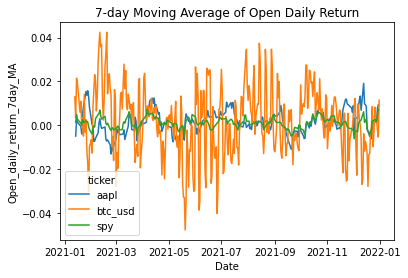

In [ ]:
sns.lineplot(x='Date',y='Open_daily_return_7day_MA', hue='ticker',data=df_melt).set(title='7-day Moving Average of Open Daily Return');

## 7. Like step 5 and perform an inner join (instead of outer join). Please notice the df shape difference between this inner join output. (Please rename the columns properly). 
- The difference in the number of rows between 5 and 7
- A short sentence describing your investigation on the root cause why the 3 dfs are not date aligned

In [ ]:
df_merge.shape # Uses the max # of rows found in any of the merged dfs, fills missing dates with NaNs

(365, 25)

In [ ]:
df_merge_inner = pd.merge(pd.merge(df_aapl, df_btc_usd, on='Date', how='inner',suffixes=['+aapl','+btc_usd']), df_spy.add_suffix('+spy'), left_on='Date', right_on='Date+spy', how='inner').drop(columns='Date+spy')

In [ ]:
df_merge_inner.shape # Uses the min # of rows found in any of the merged dfs, should be no completely missing rows

(251, 25)

The difference between the number of rows in question 5 and question 7 is 114. The three dfs roots are not aligned because trading of AAPL and SPY does not happen on holidays and weekends (which change each year), and BTC USD trades daily. The outer join includes everyday, the inner join only has those dates listed on the AAPL and SPY dataframes

## 8. A typical ML practice is to standardize/normalize across all features (sometimes targets as well). 
Two common scaling practices are 
1. Min Max Scalar $x' = \frac{x - min(x)}{max(x) - min(x)}$ 
2. Standard Scaler $x' = \frac{x - \mu}{σ}$

Write your own scalar UDFs and apply them to the 3 renamed 'Open_daily_return' columns from 7., output the scaled features to new columns.

In [ ]:
# Min-Max Scaler UDF, takes a column input. x_new = (x - x_min)/(x_max - x_min)
min_max_scaler = lambda x: (x - x.min()) / (x.max() - x.min())

In [ ]:
df_merge_inner['Min_Max_Scaled_Open_daily_return+aapl'] = min_max_scaler(df_merge_inner['Open_daily_return+aapl'])
df_merge_inner['Min_Max_Scaled_Open_daily_return+btc_usd'] = min_max_scaler(df_merge_inner['Open_daily_return+btc_usd'])
df_merge_inner['Min_Max_Scaled_Open_daily_return+spy'] = min_max_scaler(df_merge_inner['Open_daily_return+spy'])

In [ ]:
# Standard Scaler UDF, takes a column input. 
std_scaler = lambda x: (x - np.mean(x)) / np.std(x)

In [ ]:
df_merge_inner['Std_Scaled_Open_daily_return+aapl'] = std_scaler(df_merge_inner['Open_daily_return+aapl'])
df_merge_inner['Std_Scaled_Open_daily_return+btc_usd'] = std_scaler(df_merge_inner['Open_daily_return+btc_usd'])
df_merge_inner['Std_Scaled_Open_daily_return+spy'] = std_scaler(df_merge_inner['Open_daily_return+spy'])

In [ ]:
df_merge_inner.head()

,Date,Open+aapl,High+aapl,Low+aapl,Close+aapl,Adj Close+aapl,Volume+aapl,Open_daily_return+aapl,Adj_Close_daily_return+aapl,Open+btc_usd,...,Adj Close+spy,Volume+spy,Open_daily_return+spy,Adj_Close_daily_return+spy,Min_Max_Scaled_Open_daily_return+aapl,Min_Max_Scaled_Open_daily_return+btc_usd,Min_Max_Scaled_Open_daily_return+spy,Std_Scaled_Open_daily_return+aapl,Std_Scaled_Open_daily_return+btc_usd,Std_Scaled_Open_daily_return+spy
0,2021-01-04,133.520004,133.610001,126.760002,129.410004,128.453445,143301900,NaN,NaN,32810.949219,...,363.938782,110210800,NaN,NaN,NaN,0.498367,NaN,NaN,0.442230,NaN
1,2021-01-05,128.889999,131.740005,128.429993,131.009995,130.041611,97664900,-0.034676,0.012364,31977.041016,...,366.445343,66426200,-0.019211,0.006887,0.171639,0.357856,0.098541,-2.260055,-0.603246,-2.584746
2,2021-01-06,127.720001,131.050003,126.379997,126.599998,125.664215,155088000,-0.009077,-0.033661,34013.613281,...,368.636108,107997700,0.004374,0.005978,0.422587,0.626367,0.624060,-0.652399,1.394618,0.431777
3,2021-01-07,128.360001,131.630005,127.860001,130.919998,129.952286,109578200,0.005011,0.034123,36833.875000,...,374.113129,68766800,0.017284,0.014858,0.560697,0.684307,0.911727,0.232377,1.825721,2.083011
4,2021-01-08,132.429993,132.630005,130.229996,132.050003,131.073914,105158200,0.031708,0.008631,39381.765625,...,376.244751,71677200,0.011938,0.005698,0.822405,0.642892,0.792615,1.908968,1.517576,1.399299


## 9. Another ML practice is to slice data row-wise into training and testing data. For now, we are going to ignore the fact that the data is time-series, and just randomly shuffle the data and split them into training and test sets. 

### Part I: Write a function that inputs a dataframe, a parameter that determines the size of the training (vs. testing) set, and a seed parameter in case users need to repeat the randomness. Hint: there are a couple approaches: 
- Shuffle the df, and split the df into 'training' and 'testing' sets
- Use pd.DataFrame().sample()

Output:
- Apply this function to the df of 7, use training=80%, and set seed=1. Return both the training and testing data.

In [ ]:
def shuffle_train_test_split(df, training_size, seed):
  train = df.sample(frac=training_size, random_state=seed)
  test = df[~df.index.isin(train.index)]
  return train, test

In [ ]:
train, test = shuffle_train_test_split(df_merge_inner, .8, 1)

In [ ]:
train.shape

(201, 31)

In [ ]:
test.shape

(50, 31)

### Part II: Sometimes, one needs to do Stratified spliting. That is, randomly splitting data into train and test within each stratum. 
- Change the function that you just wrote and make sure it can handle the group by splitting

Output: 
- Use df from step 3, let the strata be ticker labels, use training=80% and set seed=1. Return both training and testing data.
- Hint: pd.DataFrame.sample() is probably easier to implement

In [ ]:
def stratified_sample(df, training_size, strata, seed):
  train = df.groupby(strata).sample(frac=training_size, random_state=seed)
  test = df[~df.index.isin(train.index)]
  return train, test

In [ ]:
train, test = stratified_sample(df, .8,'ticker',1)

In [ ]:
train['ticker'].value_counts()

BTC USD    292
AAPL       201
SPY        201
Name: ticker, dtype: int64

In [ ]:
test['ticker'].value_counts()

BTC USD    73
AAPL       50
SPY        50
Name: ticker, dtype: int64